## Data Import
The dataset used for this project is the Employee Turnover Analytics Dataset. It is sourced from [Kaggle](https://www.kaggle.com/datasets/akshayhedau/employee-turnover-analytics-dataset) and is stored in CSV format.

In [73]:
import pandas as pd # library used for data import, in this case the .csv file

# Load dataset
df = pd.read_csv('employee_turnover_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Organization
- Checked for null values, found none
- Noticed two categorical columns, sales and salary, and the rest are numeric when printing the first 5 rows of the dataset above
- Changed the dataset to show average weekly hours instead of monthly, as hours by week makes more sense in the context of this dataset
- Renamed the "sales" column to "department" to better represent the data and for outsiders to understand the column data better
<!-- The dataset was cleaned by removing missing values to ensure the integrity of the analysis. The following columns are used for modeling:
- `salary`
- `job_satisfaction`
- `years_at_company`
- `left` (target variable) -->

In [74]:
# Renaming 2 column names
df=df.rename(columns={'average_montly_hours':'average_weekly_hours','sales':'department'})
# Converting average monthly hours in average weekly hours
df['average_weekly_hours']=df['average_weekly_hours']*12/52
# Got info about the different columns and their data (null values, data type, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_weekly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB


## Data Analysis

In [75]:
# Quick summary statistics for the numerical columns
df.describe()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,46.396232,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,11.525331,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,22.153846,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,36.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,46.153846,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,56.538462,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,71.538462,10.000000,1.000000,1.000000,1.000000


By analyzing the numeric variables, I was able to get the following insights about the people in the dataset:

- have a relatively short tenure with the firm (average of 3.498233 years, max of 10 years)
- generally more satisfied than not (.612834 average satisfaction level)
- generally above average performers (.716102 average rating in their last evaluation)
- 14.461% (about 1 in 7) of the people have had work accidents, on average

One important note - it's a bit hard to define relative satisfaction level and rating because we don't have a basis for comparison. A .71 rating could be for a "bad" employee and possibly employers don't typically rate below that number.

In [76]:
# Quick look at the categorical variable statistics
df.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


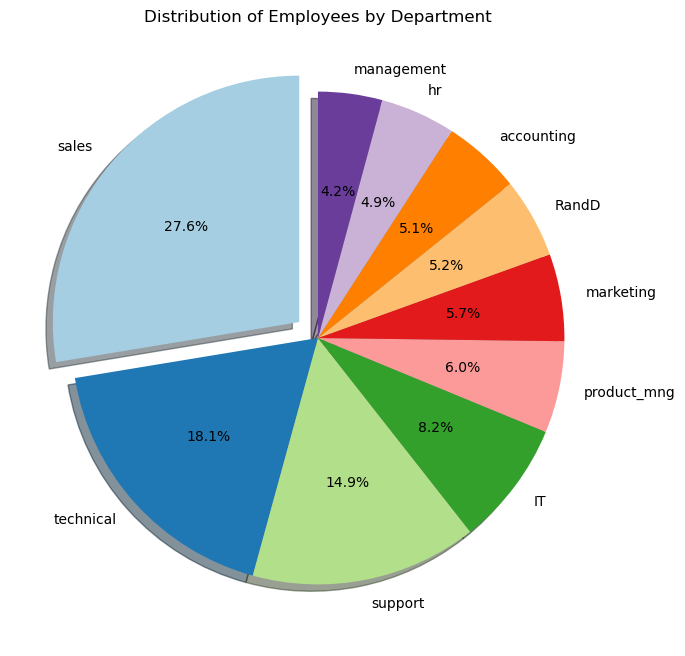

In [77]:
import matplotlib.pyplot as plt

# Count the number of employees in each department
department_counts = df['department'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
department_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    explode=[0.1 if i == department_counts.max() else 0 for i in department_counts],
    colors=plt.cm.Paired.colors, 
    shadow=True
)

# Add a title
plt.title("Distribution of Employees by Department")
plt.ylabel("")  # Remove the y-axis label for aesthetics

# Show the plot
plt.show()

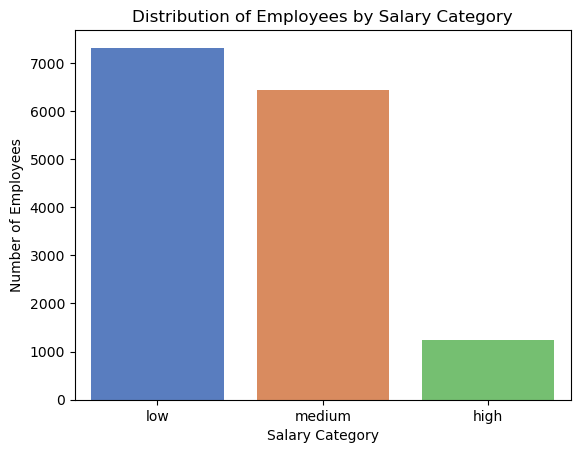

In [78]:
import seaborn as sns

# Count the number of employees in each salary category
salary_counts = df['salary'].value_counts()

# Plot the bar chart
sns.barplot(x=salary_counts.index, y=salary_counts.values, palette='muted')

# Add labels and title
plt.title('Distribution of Employees by Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Number of Employees')

# Display the chart
plt.show()

The categorical features don't provide us much significant info, other than there being 10 departments and 3 salary categories.

Now to analyze some features that would be good predictors for employees leaving. 

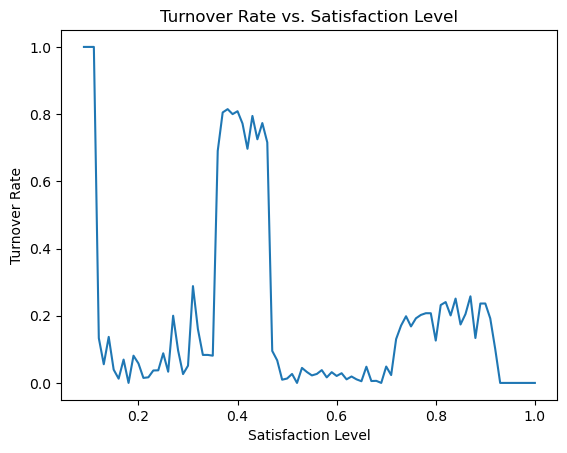

In [79]:
# Satisfaction level and turnover
leave_sat = df.groupby('satisfaction_level').agg({'left': ['sum', 'count']})
leave_sat.columns = ['left', 'total']
leave_sat['leave_rate'] = leave_sat['left'] / leave_sat['total']
sns.lineplot(x=leave_sat.index, y=leave_sat['leave_rate'])
plt.title("Turnover Rate vs. Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Turnover Rate")
plt.show()

Observation for Satisfaction level and turnover: Low satisfaction is strongly associated with higher turnover.

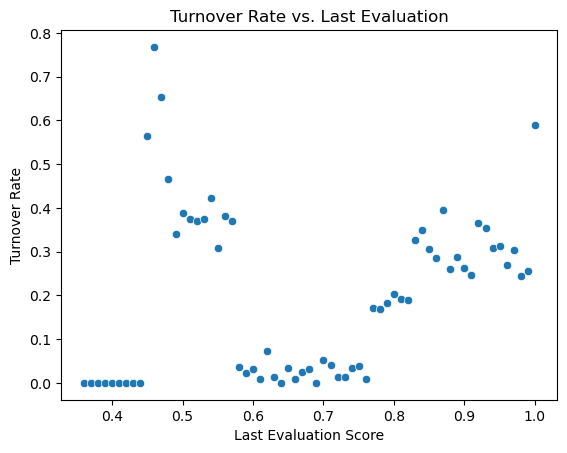

In [80]:
# Last evaluation and turnover
leave_eval = df.groupby('last_evaluation').agg({'left': ['sum', 'count']})
leave_eval.columns = ['left', 'total']
leave_eval['leave_rate'] = leave_eval['left'] / leave_eval['total']
sns.scatterplot(x=leave_eval.index, y=leave_eval['leave_rate'])
plt.title("Turnover Rate vs. Last Evaluation")
plt.xlabel("Last Evaluation Score")
plt.ylabel("Turnover Rate")
plt.show()

Observation for Last evaluation and turnover: Employees with very low or very high evaluation scores are more likely to leave.

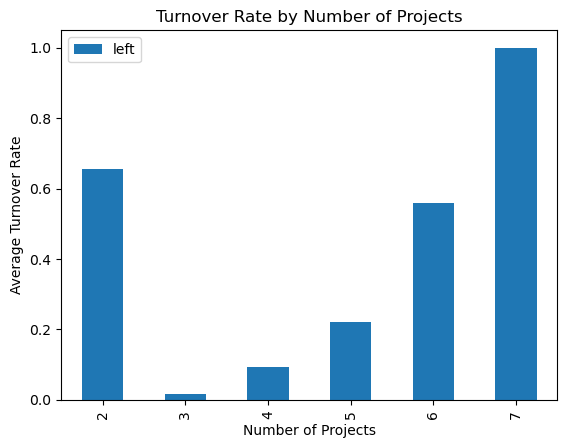

In [81]:
# Number of projects and turnover
df[['number_project', 'left']].groupby('number_project').mean().plot(kind='bar')
plt.title("Turnover Rate by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Average Turnover Rate")
plt.show()

Observation for Number of projects and turnover: Turnover is high for employees on very few or many projects.

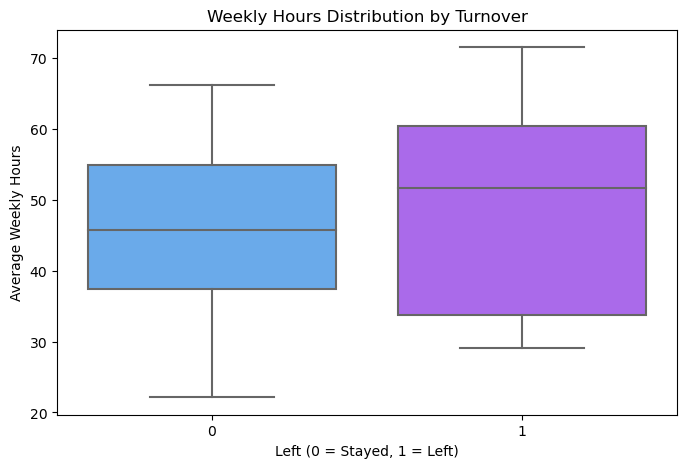

In [82]:
# Average weekly hours and turnover
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='left', y='average_weekly_hours', palette='cool')
plt.title("Weekly Hours Distribution by Turnover")
plt.xlabel("Left (0 = Stayed, 1 = Left)")
plt.ylabel("Average Weekly Hours")
plt.show()

Observation for Average weekly hours and turnover: Employees who stayed generally worked fewer hours on average, with less variability, compared to employees who left.

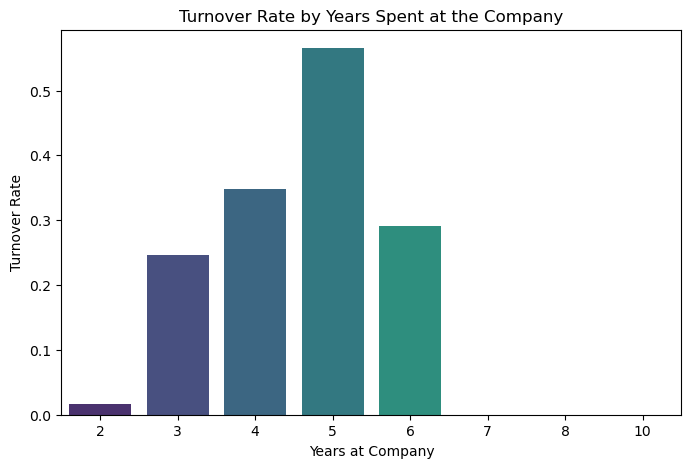

In [83]:
# Time spent at company and turnover
time_turnover = df[['time_spend_company', 'left']].groupby('time_spend_company').mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='time_spend_company', y='left', data=time_turnover, palette='viridis')
plt.title("Turnover Rate by Years Spent at the Company")
plt.xlabel("Years at Company")
plt.ylabel("Turnover Rate")
plt.show()

Observation for Time spent at company and turnover: Majority of the employees from this dataset leave after 5 years of working at the company

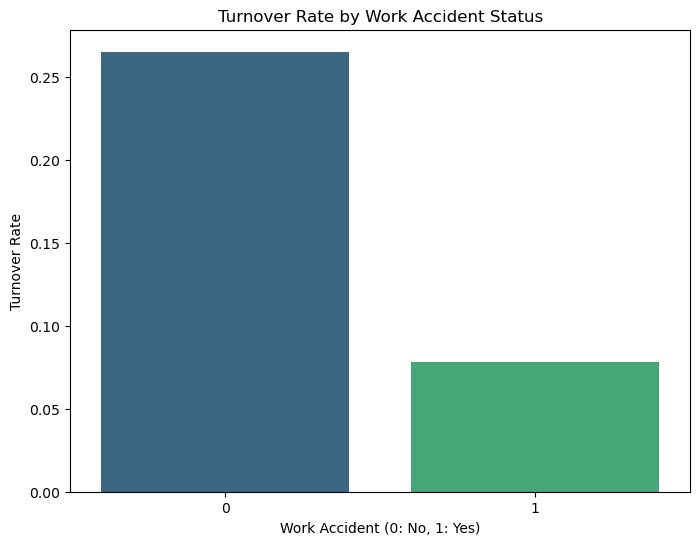

In [84]:
# Work accidents and turnover
work_accident_analysis = df[['Work_accident', 'left']].groupby('Work_accident').mean().reset_index()

# Visualization of turnover rate by work accident status
plt.figure(figsize=(8, 6))
sns.barplot(data=work_accident_analysis, x='Work_accident', y='left', palette='viridis')
plt.title('Turnover Rate by Work Accident Status')
plt.xlabel('Work Accident (0: No, 1: Yes)')
plt.ylabel('Turnover Rate')
plt.show()

Observation for Work accidents and turnover: A significant majority of employees from this dataset seem to leave if they faced a work accident.

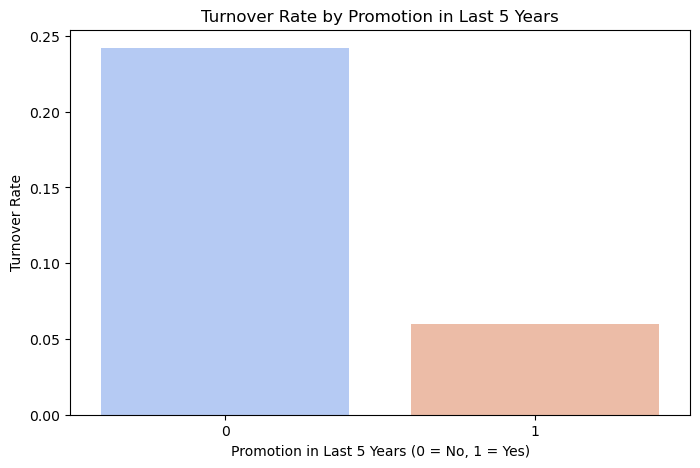

In [85]:
# Promotion in last 5 years and turnover
promotion_turnover = df[['promotion_last_5years', 'left']].groupby('promotion_last_5years').mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='promotion_last_5years', y='left', data=promotion_turnover, palette='coolwarm')
plt.title("Turnover Rate by Promotion in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years (0 = No, 1 = Yes)")
plt.ylabel("Turnover Rate")
plt.show()

Observation for Promotion in last 5 years and turnover: A significant majority of employees from this dataset seem to leave if they didn't get a promotion in the last 5 years

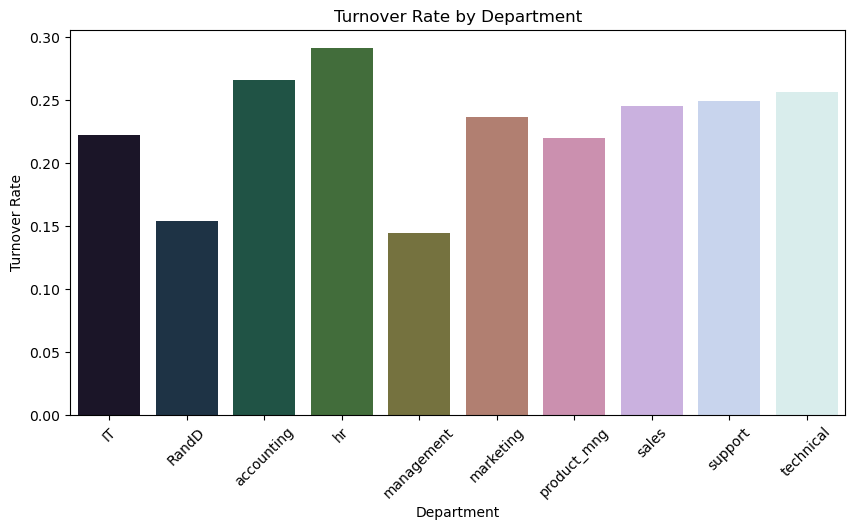

In [86]:
# Department and turnover
department_turnover = df[['department', 'left']].groupby('department').mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='department', y='left', data=department_turnover, palette='cubehelix')
plt.title("Turnover Rate by Department")
plt.xlabel("Department")
plt.ylabel("Turnover Rate")
plt.xticks(rotation=45)
plt.show()

Observation for Department and turnover: Nothing super significant from comparing these 2 variables with each other

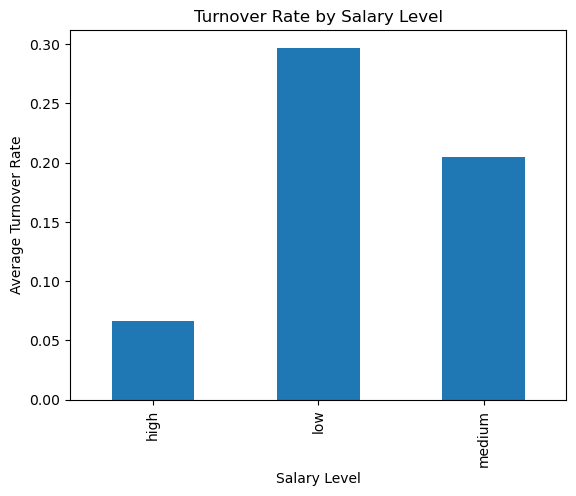

In [87]:
# Salary and turnover
df[['salary', 'left']].groupby('salary').mean().plot(kind='bar', legend=False)
plt.title("Turnover Rate by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Average Turnover Rate")
plt.show()

Observation for Salary and turnover: Salary level inversely correlates with turnover—employees with lower salaries are more likely to leave.

Dropping columns that won't be used for modeling:

In [88]:
df=df.drop(['promotion_last_5years','Work_accident','department','average_weekly_hours'],axis=1)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'left', 'salary'],
      dtype='object')

Binning (Banding) Data in the Dataset:

The code below categorizes numerical variables into specific ranges (bins) and assigns labels to these categories. This process is useful for simplifying continuous data into discrete groups, which helps be more insightful for analysis or modeling.

1. Banding the Number of Projects:
   - The `number_project` column is divided into three ranges:
     - 0 to 2 projects → Label `1`
     - 2 to 5 projects → Label `0`
     - 5 to 10 projects → Label `1`
   - A new column, `abnormal_proj`, is created to store the corresponding labels.

2. Banding Years at the Company:
   - The `time_spend_company` column (years spent at the company) is divided into seven ranges:
     - From 0 to 1 year, up to 6-100 years → Labels from `1` to `7`
   - A new column, `years_at_company`, is created to store these labels.

3. Banding Last Evaluation Score:
   - The `last_evaluation` column (evaluation score) is divided into three ranges:
     - 0 to 0.6 → Label `1`
     - 0.6 to 0.8 → Label `0`
     - 0.8 to 1 → Label `1`
   - A new column, `abnormal_eval`, is created to store these labels.


In [89]:
# Banding number of projects
bins = [0, 2, 5, 10]
names = [1, 0, 1]  # duplicate labels
df['abnormal_proj'] = pd.cut(df['number_project'], bins, labels=names, ordered=False)

# Banding years at the firm
bins2 = [0, 1, 2, 3, 4, 5, 6, 100]
names2 = ['1', '2', '3', '4', '5', '6', '7']  # unique labels
df['years_at_company'] = pd.cut(df['time_spend_company'], bins2, labels=names2, ordered=False)

# Banding last_evaluation
bins3 = [0, 0.6, 0.8, 1]
names3 = [1, 0, 1]  # duplicate labels
df['abnormal_eval'] = pd.cut(df['last_evaluation'], bins3, labels=names3, ordered=False)

df.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,0.53,2,3,1,low,1,3,1
1,0.80,0.86,5,6,1,medium,0,6,1
2,0.11,0.88,7,4,1,medium,1,4,1
3,0.72,0.87,5,5,1,low,0,5,1
4,0.37,0.52,2,3,1,low,1,3,1


In [90]:
# Cleaning up intermediary/unused columns
df=df.drop(['number_project','time_spend_company','last_evaluation'],axis=1)
df.head()

,satisfaction_level,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,1,low,1,3,1
1,0.80,1,medium,0,6,1
2,0.11,1,medium,1,4,1
3,0.72,1,low,0,5,1
4,0.37,1,low,1,3,1


In [91]:
# Turning all columns into numeric so that modeling algorithms can run successfully
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2}).astype(int)
pd.to_numeric(df['abnormal_proj'], errors='coerce')
pd.to_numeric(df['years_at_company'], errors='coerce')
pd.to_numeric(df['abnormal_eval'], errors='coerce')
df.head()

,satisfaction_level,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,1,0,1,3,1
1,0.80,1,1,0,6,1
2,0.11,1,1,1,4,1
3,0.72,1,0,0,5,1
4,0.37,1,0,1,3,1


Based on all the analysis and manipulation of the data done, the following columns are going to be helpful for modeling:

- `satisfaction_level`
- `salary`
- `abnormal_proj` (too low or high of `number_project`)
- `years_at_company`
- `abnormal_eval` (too low or high of `last_evaluation`)
- `left` (target variable)

## Train Test Split
First step for modeling, using 80-20 split, since it is standard.

In [92]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['left'])
Y = df['left']

# Check if X_train and X_test are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to numeric

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training and Testing Sets Created:")
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training and Testing Sets Created:
Training Set Size: 11999
Testing Set Size: 3000


## Model Objects, Training, and Results
The goal of our model is to use a set of employee characteristics to label them as "left" the company or "stayed" at the company. Basically, we are looking for supervised learning algorithms that perform both classification and regression. I decided these 3 algorithmns is what I want to work with since they meet the criteria and I'm most familiar with them:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree

In [93]:
# libraries for the 3 models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Predict using the model
Y_pred = logreg.predict(X_test)

# Calculate accuracy
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

85.5

The coefficients represent the level of impact each feature has on the probability of an employee leaving. 

**Taking a look at the coefficients table, we see that working on an excessive number of projects (both too few or too many) and having a stellar/poor evaluation are correlated strongest with quitting the firm. Similarly, higher satisfaction and salary tend to significantly decrease the probability of leaving the firm.**

In [95]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Coefficient"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
2,abnormal_proj,2.618878
4,abnormal_eval,2.136910
3,years_at_company,0.510715
1,salary,-0.734093
0,satisfaction_level,-1.484218


In [96]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict using the model
Y_pred = knn.predict(X_test)

# Calculate accuracy
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

97.07

In [97]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier() # max_depth of 17 or more to have an accuracy of 97.92
decision_tree.fit(X_train, Y_train)

# Predict using the model
Y_pred = decision_tree.predict(X_test)

# Calculate accuracy
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.92

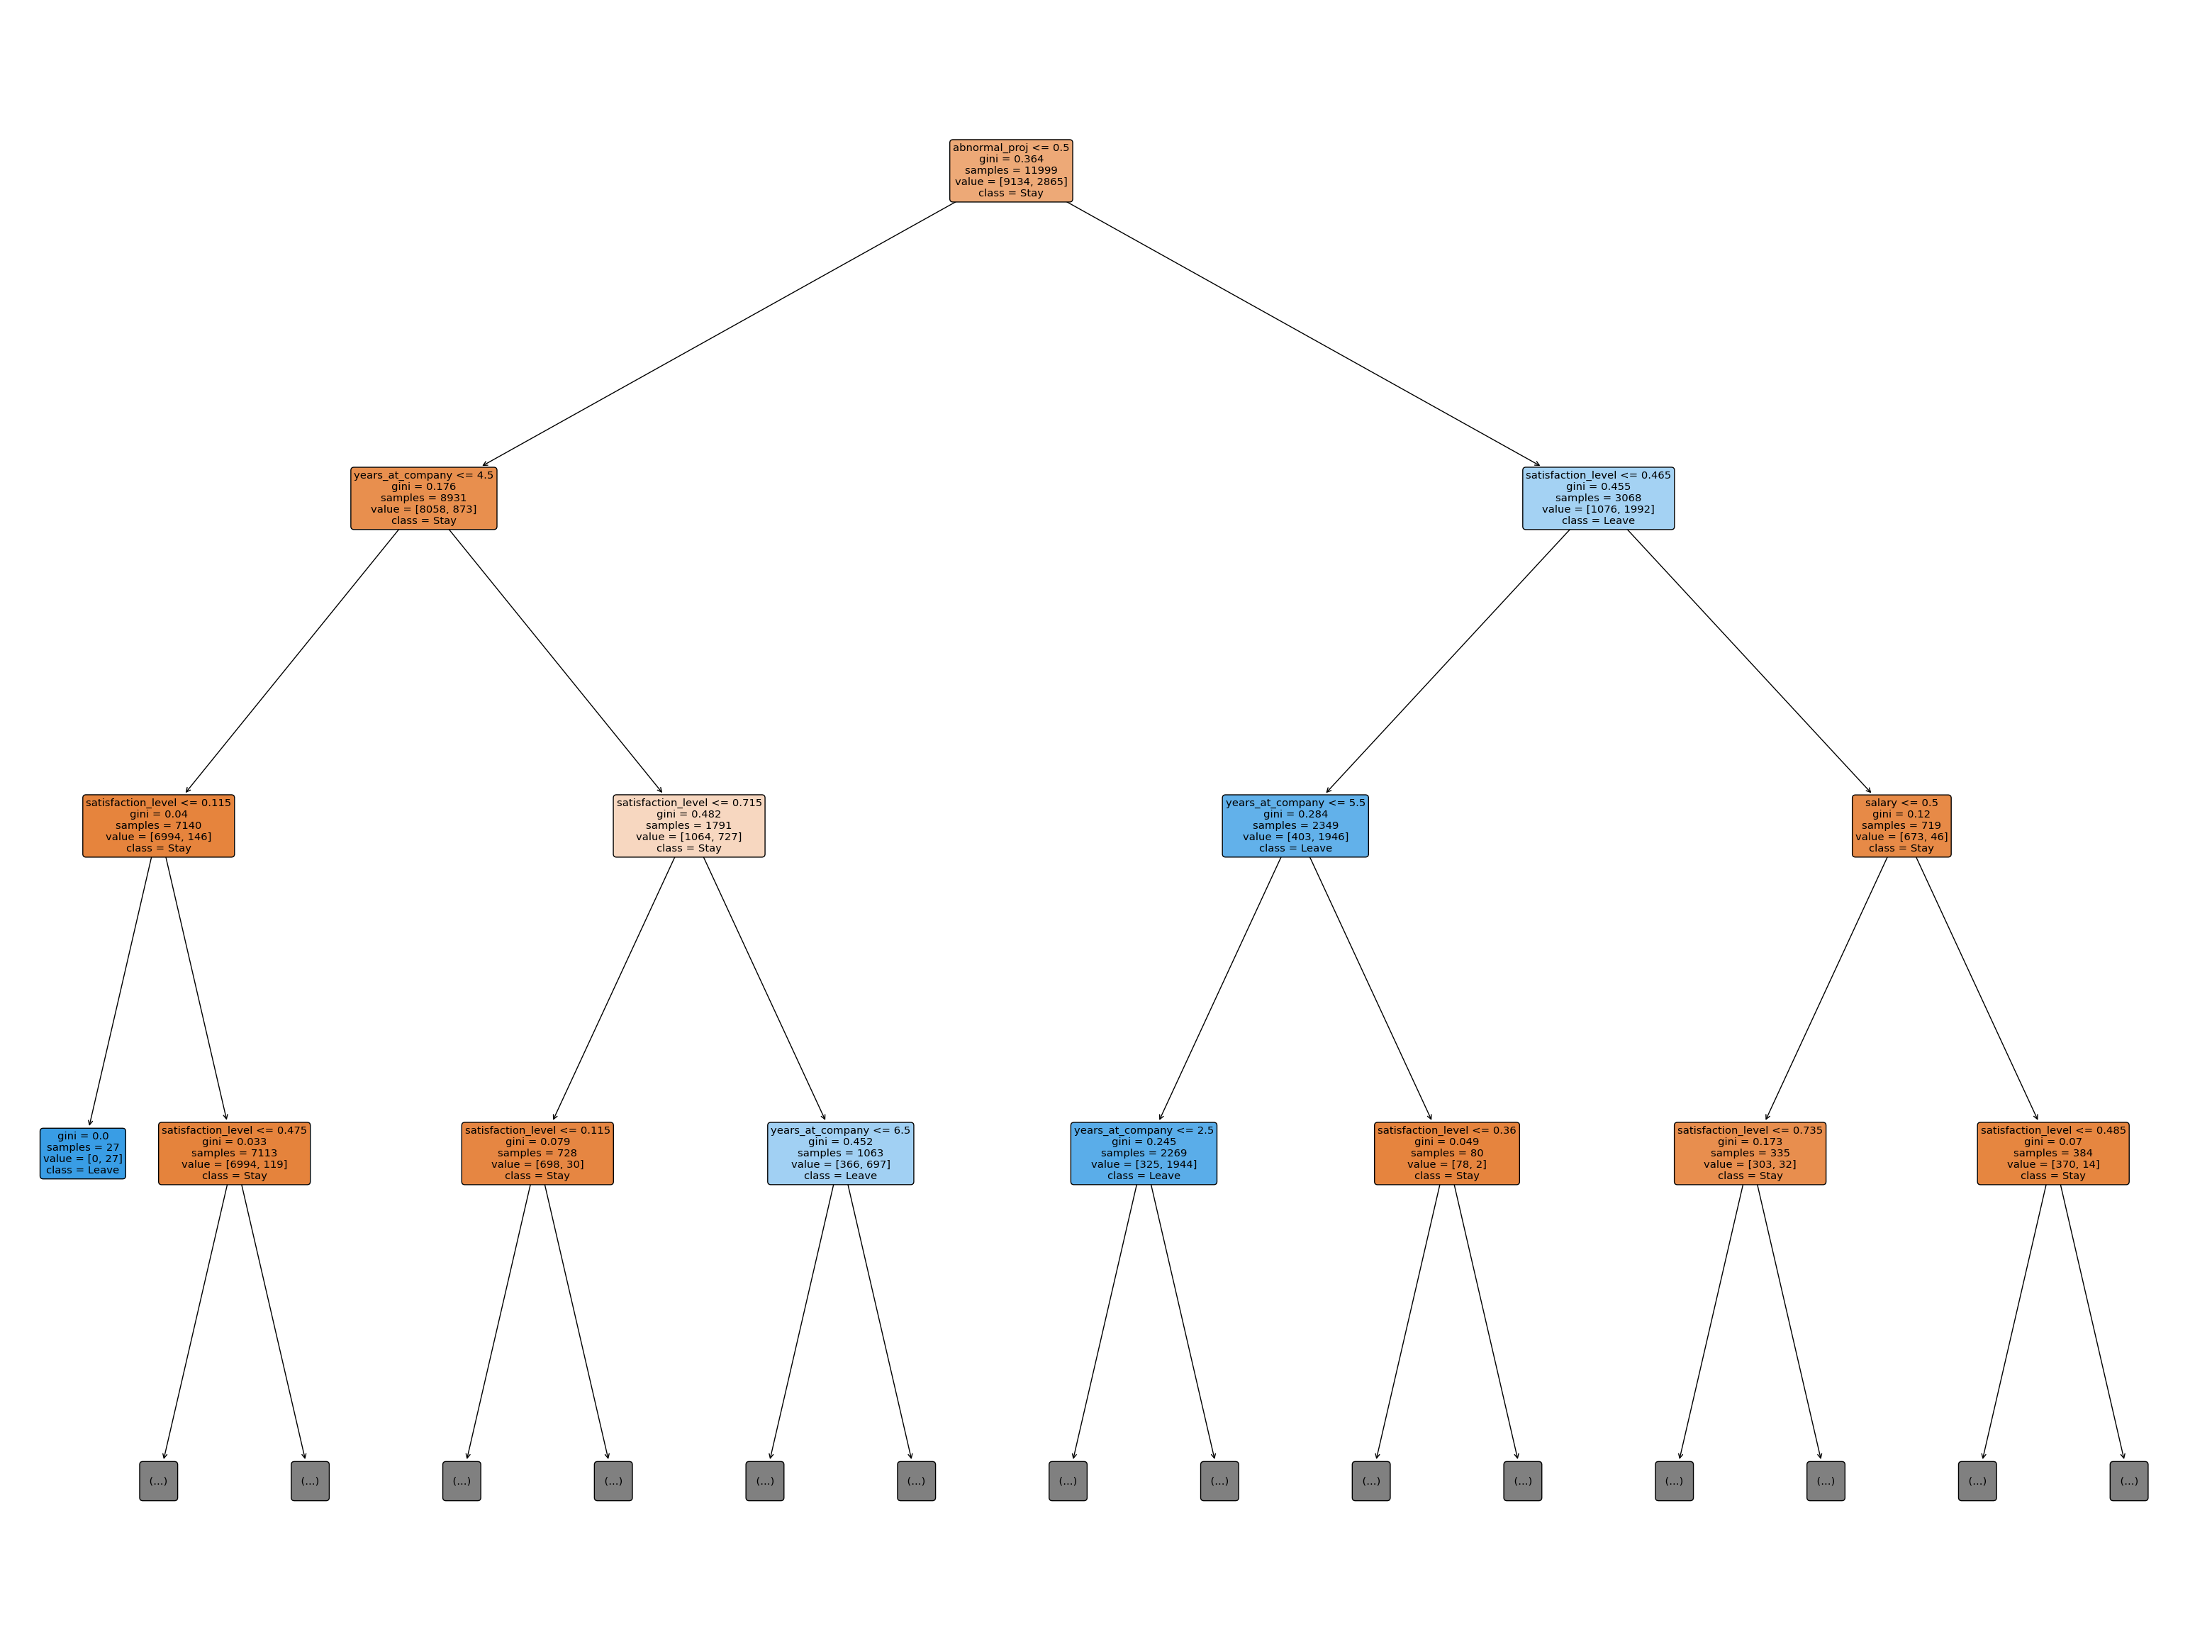

In [98]:
from sklearn import tree
# Plot the decision tree
plt.figure(figsize=(40, 30))
tree.plot_tree(decision_tree, 
               feature_names=list(X_train.columns),
               class_names=['Stay', 'Leave'],
               filled=True, 
               rounded=True,
               max_depth=3) # added this to make it more readable
plt.show()

Based on the decision tree model, the single most important attribute is abnormal amount of projects. 

In [99]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree'],
    'Score': [acc_knn, acc_log, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,97.92
0,KNN,97.07
1,Logistic Regression,85.50


With the highest accuracy at 97.92%, the Decision Tree model emerged as the best performer for this dataset. The insights found through this project highlight areas where employers can take action to improve retention and employee well-being.